In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import math

直進のグラフ

In [3]:
df_r = pd.read_csv('ROstraight.csv')
df_m = pd.read_csv('MOstraight.csv')

In [4]:
data_r_t = df_r['time[s] '][23:43].to_list()
data_r_x = df_r[' x_t[m] '][23:43].to_list()
data_r_y = df_r[' y_t[m] '][23:43].to_list()
data_r_theta = df_r['theta[deg]'][23:43].to_list()

In [5]:
data_m_t = df_m['time'][858:959].to_list()
data_m_x = df_m['x'][858:959].to_list()
data_m_y = df_m['y'][858:959].to_list()
data_m_theta = df_m['theta'][858:959].to_list()

In [6]:
def origin_match(data):
    result = [item - data[0] for item in data]
    return result

In [61]:
def diff_new_pre(data):
    result = []
    for number in len(data):
        result[number] = data[number] - data[number - 1 if number != 0 else number]
    return result

In [7]:
def left_to_right_coordinate(x, y, theta):
    result_x = [math.cos(theta) * item + math.sin(theta) * item for item in x]
    result_y = [-1 * (math.cos(theta) * item - math.sin(theta) * item) for item in y]
    return result_x, result_y

In [8]:
data_r_x = origin_match(data_r_x)
data_r_y = origin_match(data_r_y)
data_r_t = origin_match(data_r_t)
data_r_theta = origin_match(data_r_theta)

In [9]:
reseted_x = origin_match(data_m_x)
reseted_y = origin_match(data_m_y)
reseted_theta = origin_match(data_m_theta)
reseted_time = origin_match(data_m_t)

In [10]:
plt.rcParams['xtick.direction'] = 'in'  # グラフの目盛の向き'in'で内向き
plt.rcParams['ytick.direction'] = 'in'  # グラフの目盛の向き'in'で内向き
plt.rcParams["font.family"] = "Cambria" # 使用するフォント
plt.rcParams["font.size"] = 10          # 文字の大きさ

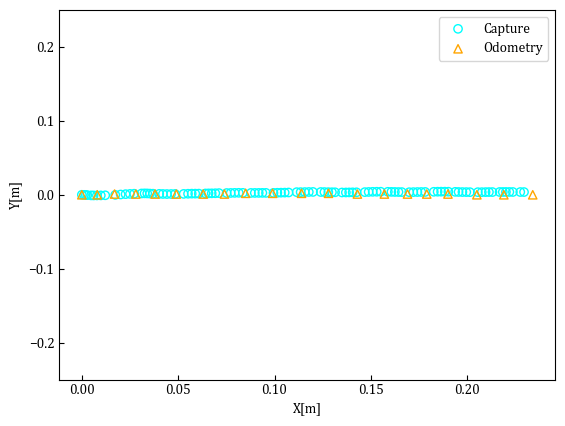

In [11]:
fig, ax = plt.subplots()
ax.scatter(reseted_x, reseted_y, label='Capture', facecolor='None', edgecolors='cyan')
ax.scatter(data_r_x, data_r_y, label='Odometry', marker='^', facecolor='None', edgecolors='orange')
ax.set_ylim(-0.25, 0.25)
ax.set_xlabel ('X[m]')
ax.set_ylabel('Y[m]')
ax.legend()
plt.show()

In [12]:
reseted_theta = [item * 180 / math.pi for item in reseted_theta]

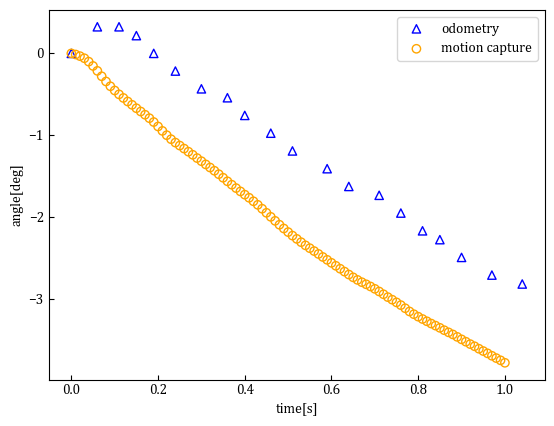

In [13]:
fig, ax = plt.subplots()
ax.scatter(data_r_t, data_r_theta, label='odometry', marker='^', facecolor='None', edgecolors='blue')
ax.scatter(reseted_time, reseted_theta, label='motion capture', facecolor='none', edgecolors='orange')
ax.set_xlabel ('time[s]')
ax.set_ylabel('angle[deg]')
ax.legend()
plt.show()

その場旋回

In [46]:
df_r_turn = pd.read_csv('ROturn.csv')
df_m_turn = pd.read_csv('MOturn.csv')

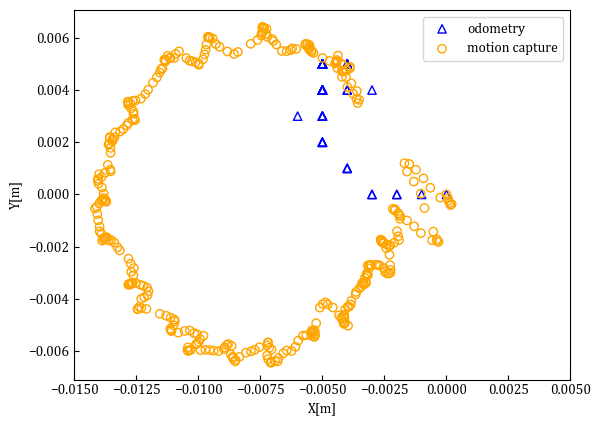

In [15]:
fig, ax = plt.subplots()
ax.scatter(origin_match(df_r_turn[' x_t[m] '][14:75].to_list()), origin_match(df_r_turn[' y_t[m] '][14:75].to_list()), label='odometry', marker='^', facecolor='none', edgecolors='blue')
ax.scatter(origin_match(df_m_turn['x'][648:1000].to_list()), origin_match(df_m_turn['y'][648:1000].to_list()), label='motion capture', facecolor='none', edgecolors='orange')
ax.set_xlabel ('X[m]')
ax.set_ylabel('Y[m]')
ax.set_xlim(-0.015, 0.005)
ax.legend()
plt.show()

In [70]:
theta_m = [item * 180 / math.pi for item in df_m_turn['theta'][648:1000]]
theta = [item * 180 / math.pi for item in df_m_turn['theta']]
# theta = diff_new_pre([item * 180 / math.pi for item in df_m_turn['theta'][20:1100]])

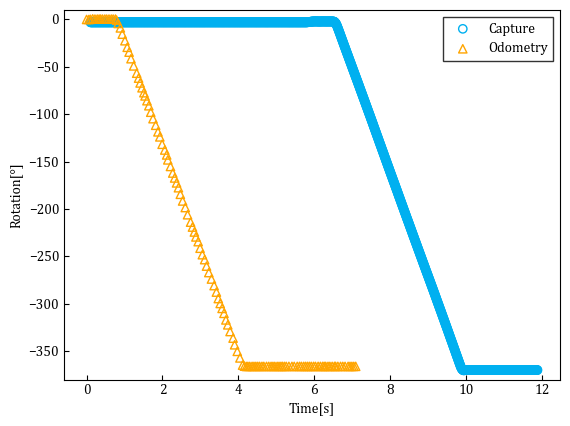

In [71]:
fig, ax = plt.subplots()
ax.scatter(df_m_turn['time'].to_list(),theta, label='Capture', facecolor='none', edgecolors='#00B0F0')
ax.scatter(df_r_turn['time[s] '].to_list(), df_r_turn['theta[deg]'], label='Odometry', marker='^', facecolor='None', edgecolors='orange')
ax.set_xlabel('Time[s]')
ax.set_ylabel('Rotation[°]')
ax.set_ylim(-380, 10)
ax.legend(edgecolor='black',fancybox=False)
plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


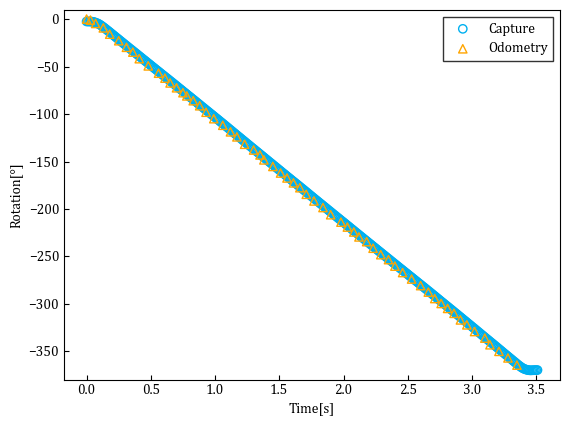

In [43]:
fig, ax = plt.subplots()
ax.scatter(origin_match(df_m_turn['time'][648:1000].to_list()),theta_m, label='Capture', facecolor='none', edgecolors='#00B0F0')
ax.scatter(origin_match(df_r_turn['time[s] '][14:75].to_list()), df_r_turn['theta[deg]'][14:75], label='Odometry', marker='^', facecolor='None', edgecolors='orange')
ax.set_xlabel('Time[s]')
ax.set_ylabel('Rotation[°]')
ax.set_ylim(-380, 10)
ax.legend(edgecolor='black',fancybox=False)
plt.savefig('RotTimturn.eps')
plt.show()

直進 -> 旋回 -> 直進

In [18]:
df_r_L = pd.read_csv('ROst_tu_st.csv')
df_m_L = pd.read_csv('MOst_tu_st.csv')

In [19]:
data_m_x = df_m_L['0.1'][837:1838].to_list()
data_m_y = df_m_L['0.2'][837:1838].to_list()
data_m_th = df_m_L['NaN'][837:1838].to_list()
data_m_t = df_m_L['0'][837:1838].to_list()

In [20]:
data_m_x = origin_match(data_m_x)
data_m_y = origin_match(data_m_y)

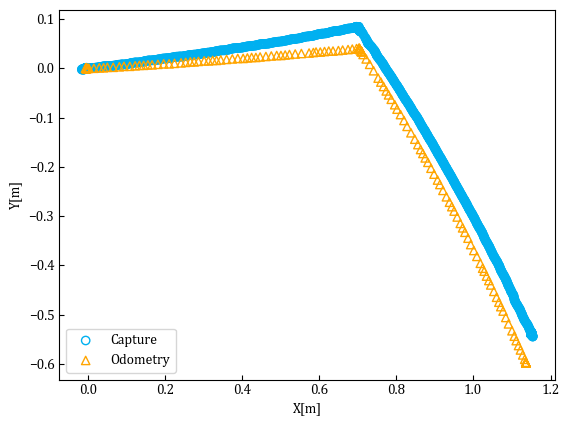

In [29]:
fig, ax = plt.subplots()
ax.scatter(data_m_x, data_m_y, label='Capture', facecolor='none', edgecolors='#00B0F0')
ax.scatter(df_r_L[' x_t[m] '][:184], df_r_L[' y_t[m] '][:184], label='Odometry', marker='^', facecolor='none', edgecolors='orange')
ax.set_xlabel('X[m]')
ax.set_ylabel('Y[m]')
ax.legend(loc='lower left')
plt.show()

In [22]:
data_m_L_time = origin_match(data_m_t)
data_m_L_theta = origin_match(data_m_th)

In [23]:
data_m_L_theta = [item * 180 / math.pi for item in data_m_L_theta]

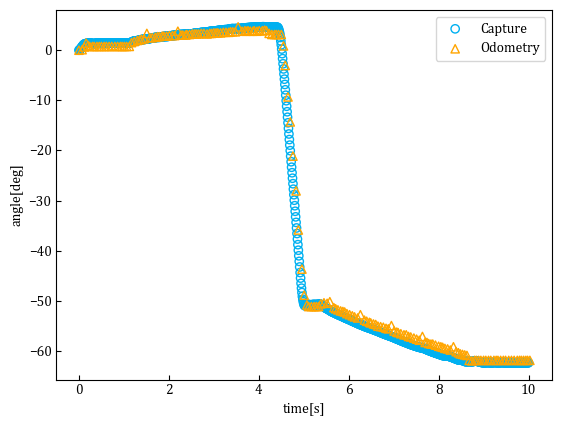

In [30]:
fig, ax = plt.subplots()
ax.scatter(data_m_L_time, data_m_L_theta, label='Capture', facecolor='none', edgecolors='#00B0F0')
ax.scatter(df_r_L['time[s] '][:184], df_r_L['theta[deg]'][:184], label='Odometry', marker='^', facecolor='none', edgecolors='orange')
ax.set_xlabel('time[s]')
ax.set_ylabel('angle[deg]')
ax.legend()
plt.show()

カーブ

In [33]:
df_r_c = pd.read_csv('ROcurve.csv')
df_m_c = pd.read_csv('MOcurve.csv')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


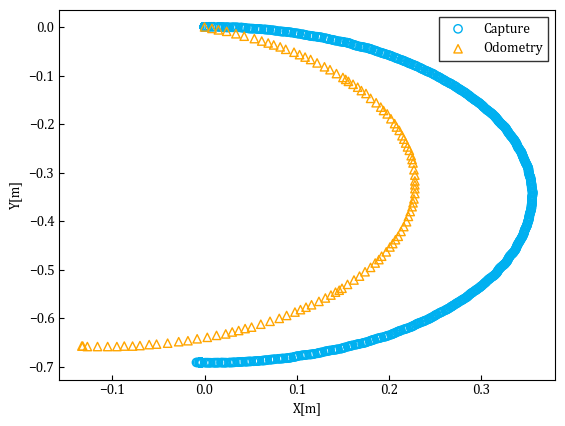

In [42]:
fig, ax = plt.subplots()
ax.scatter(origin_match(df_m_c['x'].to_list()), origin_match(df_m_c['y'].to_list()), label='Capture', facecolor='none', edgecolors='#00B0F0')
ax.scatter(origin_match(df_r_c[' x_t[m] '][26:133].to_list()), origin_match(df_r_c[' y_t[m] '][26:133].to_list()), label='Odometry', marker='^', facecolor='none', edgecolors='orange')
ax.set_xlabel('X[m]')
ax.set_ylabel('Y[m]')
# ax.set_xlim(-0.2, 0.5)
ax.legend(edgecolor='black',fancybox=False)
plt.savefig("XYcurve.eps")
plt.show()

In [27]:
data_m_c = [item * 180 / math.pi for item in origin_match(df_m_c['theta'][700:1300].to_list())]

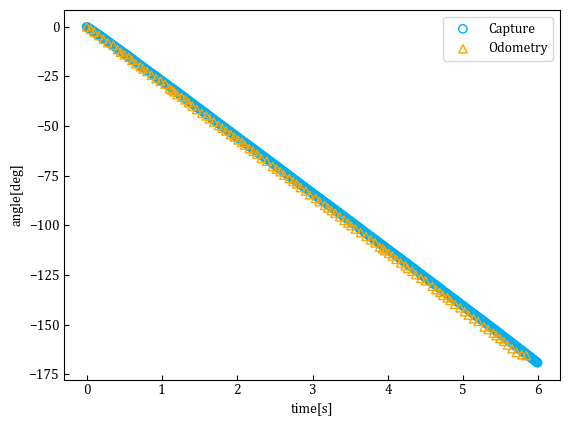

In [32]:
fig, ax = plt.subplots()
ax.scatter(origin_match(df_m_c['time'][700:1300].to_list()), data_m_c, label='Capture', facecolor='none', edgecolors='#00B0F0')
ax.scatter(origin_match(df_r_c['time[s] '][26:133].to_list()), origin_match(df_r_c['theta[deg]'][26:133].to_list()), label='Odometry', marker='^', facecolor='none', edgecolors='orange')
ax.set_xlabel('time[s]')
ax.set_ylabel('angle[deg]')
ax.legend()
plt.show()